In [1]:
import pandas as pd
import seaborn as sns
import string
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


In [42]:
data_reviews = pd.read_csv('../../data/RAW_interactions.csv')
data_recipes = pd.read_csv('../../data/RAW_recipes.csv')

In [5]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

data_reviews['clean_reviews'] = data_reviews.review.apply(remove_punctuation)

data_reviews.head()

AttributeError: 'float' object has no attribute 'replace'

In [6]:
def lowercase (text):
    lowercased = text.lower()
    return lowercased

data_reviews['clean_reviews'] = data_reviews.clean_reviews.apply(lowercase)

data_reviews.head()

AttributeError: 'DataFrame' object has no attribute 'clean_reviews'

In [ ]:
def remove_numbers (text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

data_reviews['clean_reviews'] = data_reviews.clean_reviews.apply(remove_numbers)

data_reviews.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great with a salad cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",so simple so delicious great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,this worked very well and is easy i used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,i made the mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made the cheddar bacon topping adding a sprin...


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = set(stopwords.words('english'))

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

data_reviews['clean_reviews'] = data_reviews.clean_reviews.apply(remove_stopwords)

data_reviews.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"[great, salad, cooked, top, stove, minutes, ad..."
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...","[simple, delicious, great, chilly, fall, eveni..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,"[worked, well, easy, used, quite, whole, packa..."
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,"[made, mexican, topping, took, bunko, everyone..."
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...","[made, cheddar, bacon, topping, adding, sprink..."


In [ ]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

data_reviews['clean_reviews'] = data_reviews.clean_reviews.apply(lemma)

data_reviews.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great salad cooked top stove minute added shak...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",simple delicious great chilly fall evening dou...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,worked well easy used quite whole package oz w...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,made mexican topping took bunko everyone loved
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made cheddar bacon topping adding sprinkling b...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(data_reviews.clean_reviews)
X_bow

<1132198x117613 sparse matrix of type '<class 'numpy.int64'>'
	with 26733756 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

cv_nb = cross_validate( MultinomialNB(), X_bow, data_reviews.rating, scoring = "accuracy")

cv_nb['test_score'].mean()

0.7236207783637204

In [ ]:
data_reviews = data_reviews.drop_duplicates()
data_reviews = data_reviews.dropna()
data_reviews.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
reviews = pd.DataFrame()
reviews['review'] = data_reviews['review']
reviews['review'] = reviews['review'].apply(lambda x : x.strip().lower())
reviews['review']


0          great with a salad. cooked on top of stove for...
1          so simple, so delicious! great for chilly fall...
2          this worked very well and is easy.  i used not...
3          i made the mexican topping and took it to bunk...
4          made the cheddar bacon topping, adding a sprin...
                                 ...                        
1132362    another approach is to start making sauce with...
1132363    these were so delicious!  my husband and i tru...
1132364    wow!  sometimes i don't take the time to rate ...
1132365    very good!  i used regular port as well.  the ...
1132366    i am so glad i googled and found this here. th...
Name: review, Length: 1132198, dtype: object

In [ ]:
total_nb_of_reviews = data_reviews['review']
nb_of_na_reviews = total_nb_of_reviews.isna().sum()

print(total_nb_of_reviews.count(), nb_of_na_reviews)

1132198 169


In [ ]:
total_nb_of_reviews_wo_na = data_reviews['review'].dropna()
total_nb_of_reviews_wo_na.count()

1132198

<Axes: xlabel='rating', ylabel='Count'>

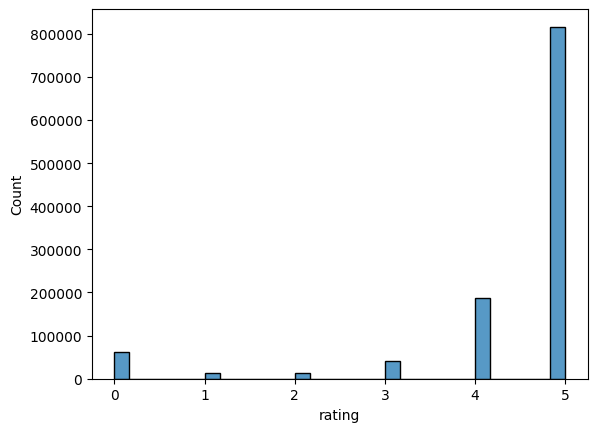

In [ ]:
sns.histplot(data=data_reviews, x="rating", bins=30)

In [43]:
data_recipes_numeric = data_recipes.drop(columns=['steps', 'description', 'ingredients', 'tags', 'nutrition', 'name', 'submitted'])
data_recipes_numeric.isnull().sum().sort_values(ascending=False)

id                0
minutes           0
contributor_id    0
n_steps           0
n_ingredients     0
dtype: int64

In [44]:
data_recipes_numeric.sort_values('minutes', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
144074,261647,2147483647,464080,9,8
109624,447963,1051200,576273,9,2
106563,291571,288000,553251,12,3
38116,216215,259260,242729,18,7
106963,425681,259205,28177,9,2
...,...,...,...,...,...
222637,3313,0,1534,11,6
87581,4471,0,1534,10,8
179544,7894,0,157425,4,7
104597,4215,0,1908,6,6


In [45]:

data_recipes_numeric.drop(data_recipes_numeric[data_recipes_numeric.minutes > 5000].index, inplace=True)
data_recipes_numeric


,id,minutes,contributor_id,n_steps,n_ingredients
0,137739,55,47892,11,7
1,31490,30,26278,9,6
2,112140,130,196586,6,13
3,59389,45,68585,11,11
4,44061,190,41706,5,8
...,...,...,...,...,...
231632,486161,60,227978,7,22
231633,493372,5,1500678,1,13
231634,308080,40,37779,7,8
231635,298512,29,506822,9,10


In [54]:
data_recipes_numeric[['minutes']].boxplot();

In [57]:
data_recipes_numeric.sort_values('n_steps', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
78633,158120,210,182358,145,8
51528,192468,240,232669,113,24
51532,156874,1080,10033,110,13
1627,65007,245,87300,108,24
70088,356724,1680,467583,100,19
...,...,...,...,...,...
201032,225435,5,430471,1,5
110318,294875,5,793569,1,2
201022,389590,5,244082,1,4
106751,331483,1,956686,1,4


In [58]:

data_recipes_numeric.drop(data_recipes_numeric[data_recipes_numeric.n_steps > 40].index, inplace=True)
data_recipes_numeric


,id,minutes,contributor_id,n_steps,n_ingredients
0,137739,55,47892,11,7
1,31490,30,26278,9,6
2,112140,130,196586,6,13
3,59389,45,68585,11,11
4,44061,190,41706,5,8
...,...,...,...,...,...
231632,486161,60,227978,7,22
231633,493372,5,1500678,1,13
231634,308080,40,37779,7,8
231635,298512,29,506822,9,10


In [61]:
data_recipes_numeric.sort_values('n_ingredients', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
2162,3748,80,1535,12,43
139659,258192,330,546010,39,40
230245,234840,70,377070,39,40
116744,113677,270,128473,9,39
18352,248707,55,305531,16,38
...,...,...,...,...,...
114835,250967,1,47892,2,1
86040,153034,35,249074,37,1
13958,434212,35,542159,2,1
127894,371048,5,482933,2,1


In [62]:
sns.histplot(data_recipes_numeric['n_ingredients'], bins=200,kde = True);
